# EDA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("../data/raw/stars.csv")

In [89]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [90]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [91]:
rename_cols = {
    'Temperature (K)': 'temperature',
    'Luminosity(L/Lo)': 'luminosity',
    'Radius(R/Ro)': 'radius',
    'Absolute magnitude(Mv)': 'magnitude',
    'Star type': 'type',
    'Star color': 'color',
    'Spectral Class': 'class'
}

df = df.rename(columns=rename_cols)
df.head()

,temperature,luminosity,radius,magnitude,type,color,class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  240 non-null    int64  
 1   luminosity   240 non-null    float64
 2   radius       240 non-null    float64
 3   magnitude    240 non-null    float64
 4   type         240 non-null    int64  
 5   color        240 non-null    object 
 6   class        240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [93]:
df.isnull().sum()

temperature    0
luminosity     0
radius         0
magnitude      0
type           0
color          0
class          0
dtype: int64

In [94]:
df.describe()

,temperature,luminosity,radius,magnitude,type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [95]:
df.nunique()

temperature    228
luminosity     208
radius         216
magnitude      228
type             6
color           19
class            7
dtype: int64

In [96]:
df['color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [97]:
df["color"].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
white                   3
Blue white              3
Orange                  2
Whitish                 2
yellowish               2
White-Yellow            1
Blue white              1
Pale yellow orange      1
Blue-White              1
Yellowish               1
Blue                    1
Orange-Red              1
Name: color, dtype: int64

In [105]:
df["color"] = df["color"].str.lower().str.replace(" ", "").str.replace("-", "")
df["color"].value_counts()

red                 112
blue                 56
bluewhite            41
white                10
yellowwhite           8
yellowishwhite        3
yellowish             3
orange                2
whitish               2
whiteyellow           1
orangered             1
paleyelloworange      1
Name: color, dtype: int64

In [106]:
df["color"] = (
    df["color"].str.replace("yellowishwhite", "yellowwhite")
    .str.replace("whiteyellow", "yellowwhite")
    .str.replace("whitish", "white")
    .str.replace("orangered", "orange")
    .str.replace("paleyelloworange", "orange")
)
df["color"].value_counts()

red            112
blue            56
bluewhite       41
yellowwhite     12
white           12
orange           4
yellowish        3
Name: color, dtype: int64

In [98]:
df["class"].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: class, dtype: int64

In [107]:
# convert category to numbers

columns_to_category = ['color', 'class']

for col in columns_to_category:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

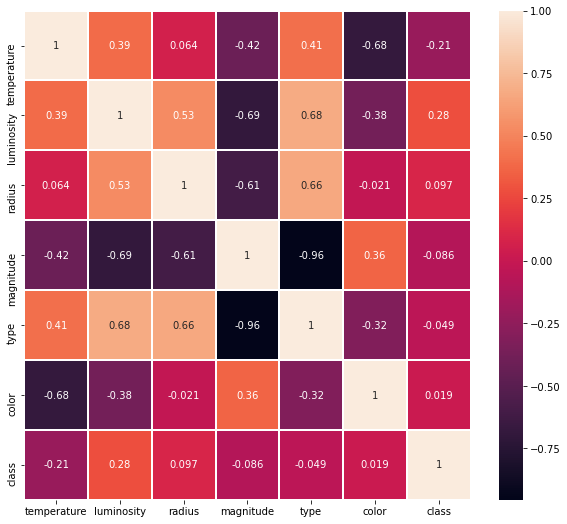

In [108]:
plt.figure(figsize=(10, 9));
sns.heatmap(df.corr(), annot=True, linewidths=0.3);

C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


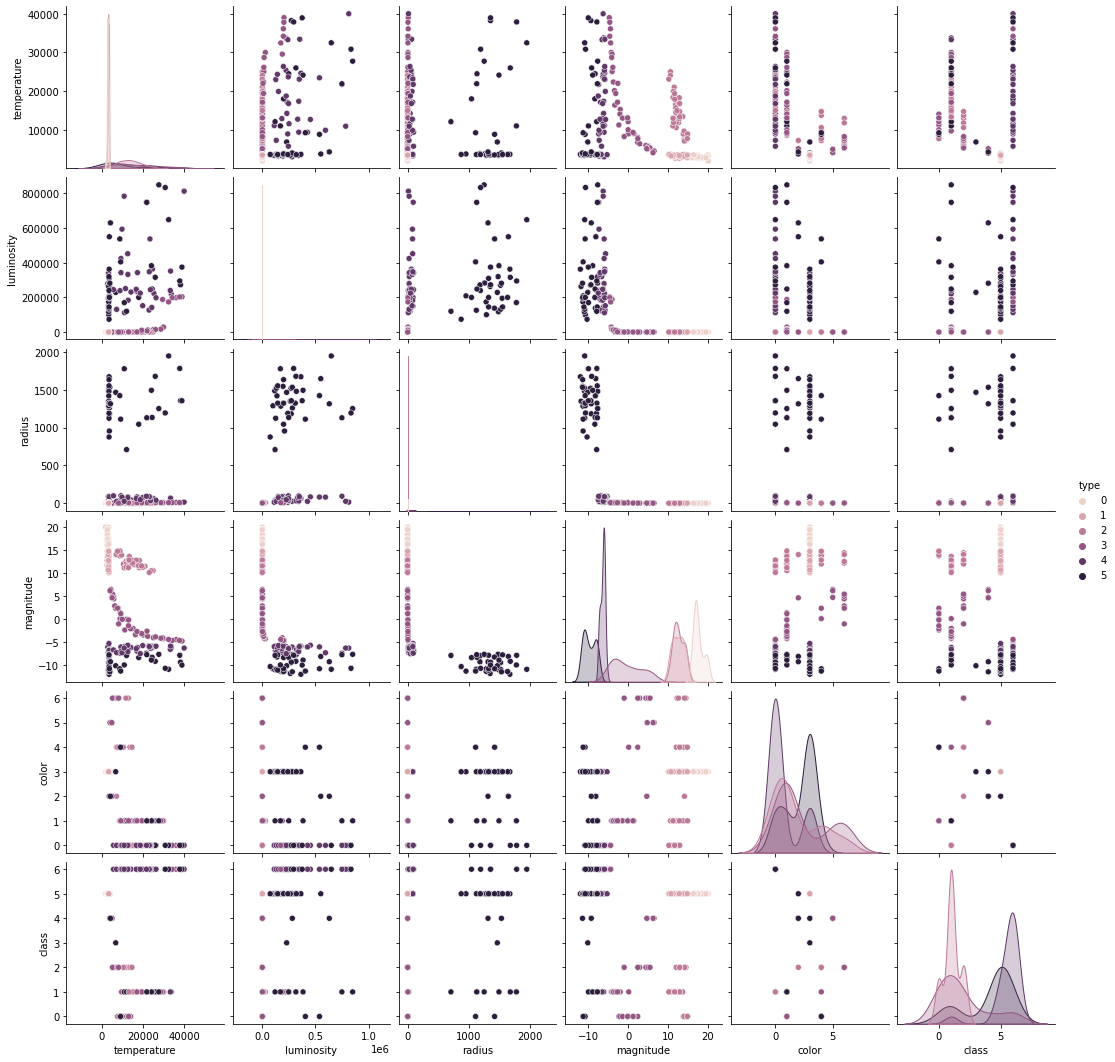

In [109]:
sns.pairplot(df, hue='type');

C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\opolchen\AppData\Local\Continuum\anaconda3\envs\ml_in_prod\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 v

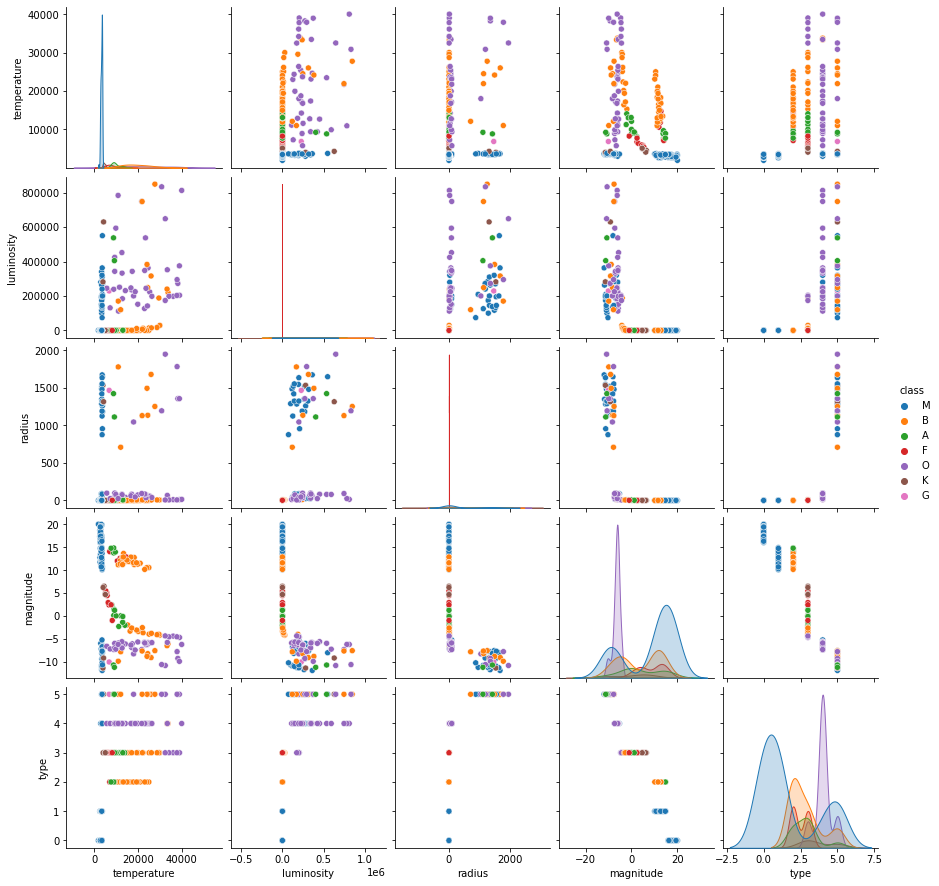

In [99]:
sns.pairplot(df, hue='class');

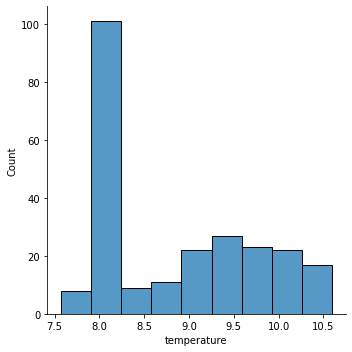

In [100]:
sns.displot(np.log1p(df["temperature"]));

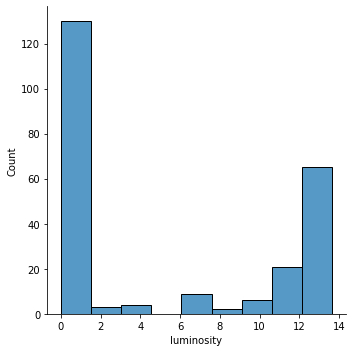

In [101]:
sns.displot(np.log1p(df["luminosity"]));

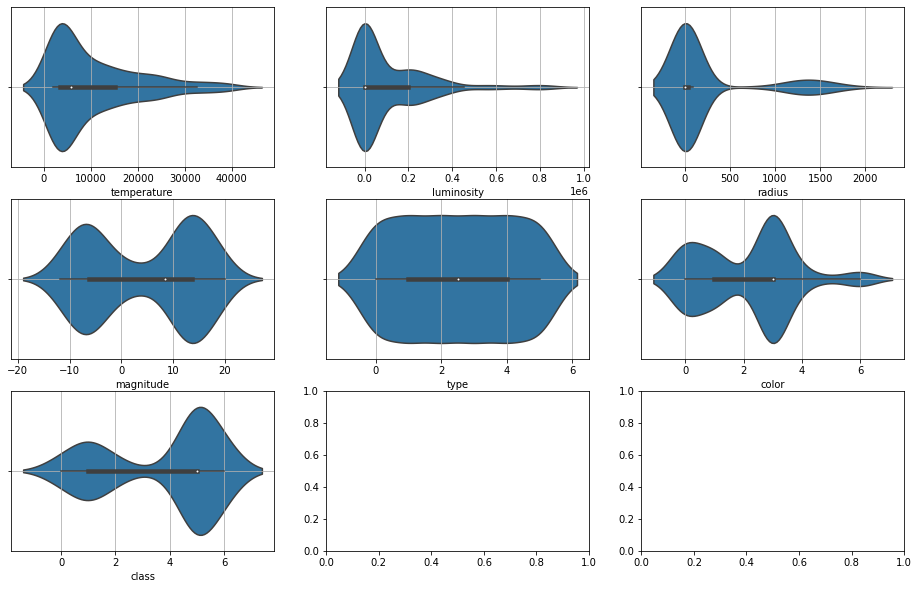

In [110]:
fig, axs = plt.subplots(3, 3);
fig.set_figheight(10);
fig.set_figwidth(16);

for i, col in enumerate(df.columns):
    sns.violinplot(x=df[col], ax=axs.ravel()[i], orient="h");
    axs.ravel()[i].grid(True);


# Model prototype

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [113]:
model = RandomForestClassifier()

In [117]:
target_col = 'class'
X = df.drop(target_col, axis=1)
y = df[target_col]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=242
)

In [119]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
y_pred = model.predict(X_test)

In [125]:
f1_score(y_pred, y_test, average='micro')

0.9